In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from matplotlib.font_manager import FontProperties
font_path = r'C:\Windows\Fonts\msjh.ttc'
zh_font = FontProperties(fname=font_path)
sns.set(font=zh_font.get_name())


# Load data

In [2]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


# Question 1: Data Preparation

## Q1.1
Report the number of academic departments and student applicants in your dataset.

In [3]:
# only include an academic department if it received ten or more applications
# AS IS
# only include a student applicant if he or she applied for more than one academic department.

while(True):
    stu_adm = stu_adm[stu_adm['department_id'].map(stu_adm['department_id'].value_counts()) > 9]
    check_student_id = stu_adm['student_id'].value_counts() <= 1
    if check_student_id.any() == False:
        break
    stu_adm = stu_adm[stu_adm['student_id'].map(stu_adm['student_id'].value_counts()) > 1]
    check_department = stu_adm['department_id'].value_counts() <= 10
    if check_department.any() == False:
        break

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

There are 47386 students and 1917 departments in total.


## Q1.2
Report the top ten departments that received the most applications and the number of applications they received. Identify the department by its department_id and names.

In [4]:
top_ten_departments = stu_adm['department_id'].value_counts().head(10)
for i in top_ten_departments.index:
    department_name = uname[uname['department_id'] == i]['department_name']
    print(i, department_name, top_ten_departments[i])

008122 976    機械工程學系
Name: department_name, dtype: object 386
012052 1764    藥學系
Name: department_name, dtype: object 376
046032 1444    會計學系（臺北校區）
Name: department_name, dtype: object 367
004382 210    電機工程學系
Name: department_name, dtype: object 357
005192 937    企業管理學系
Name: department_name, dtype: object 353
008112 982    土木工程學系
Name: department_name, dtype: object 353
005182 935    會計學系
Name: department_name, dtype: object 351
015342 1101    財務金融學系
Name: department_name, dtype: object 340
045012 1384    電機工程學系
Name: department_name, dtype: object 339
015222 1114    資訊工程學系
Name: department_name, dtype: object 329


In [5]:
# create the matrix
stu_adm_df = pd.get_dummies(stu_adm.student_id).groupby(stu_adm.department_id).apply(max)
stu_adm_matrix = stu_adm_df.values

In [6]:
print(stu_adm_df.shape)
print(stu_adm_matrix.shape)
print(uname.shape)
print(stu_adm.shape)

(1917, 47386)
(1917, 47386)
(2001, 9)
(167877, 7)


In [8]:
uname = uname.set_index('department_id')

In [9]:
dep_label = []
for i in stu_adm_df.index:
    cat = int(uname['category_id'][i])
    #if cat > 20:
    #    cat = cat/10
    dep_label.append(cat)

# Question 3: Refine

In [74]:
data_point_label = []
for i in stu_adm_df.index:
    name = uname['school_name_abbr'][i] + uname['department_name_abbr'][i]
    data_point_label.append(name)

In [133]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': pd.Series(x), 'y': pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']), size='1')

# Question 2: Explore

## Q2.1
Visualize academic departments using the first eight principal components. Use your judgment to select multiple pairs of principal components to visualize. Discuss the visual patterns with respect to department categories.

In [77]:
stu_adm_matrix_std = StandardScaler().fit_transform(stu_adm_matrix)
pca = PCA(n_components=8)
X_new = pca.fit_transform(stu_adm_matrix)

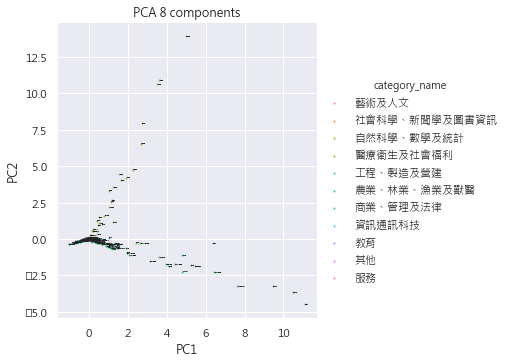

In [109]:
category_name = {
    1:'教育',
    2:'藝術及人文',
    3:'社會科學、新聞學及圖書資訊',
    4:'商業、管理及法律',
    5:'自然科學、數學及統計',
    6:'資訊通訊科技',
    7:'工程、製造及營建',
    8:'農業、林業、漁業及獸醫',
    9:'醫療衛生及社會福利',
    10:'服務',
    99:'其他'
}

pc_df = pd.DataFrame(data = X_new , 
        columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pc_df['Cluster'] = dep_label
pc_df['category_name'] = pc_df['Cluster'].map(category_name)

ax = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='category_name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size
plt.title('PCA 8 components')
label_point(pc_df.PC1, pc_df.PC2, data_point_label, plt.gca())
plt.savefig("pca.png", dpi=1000)

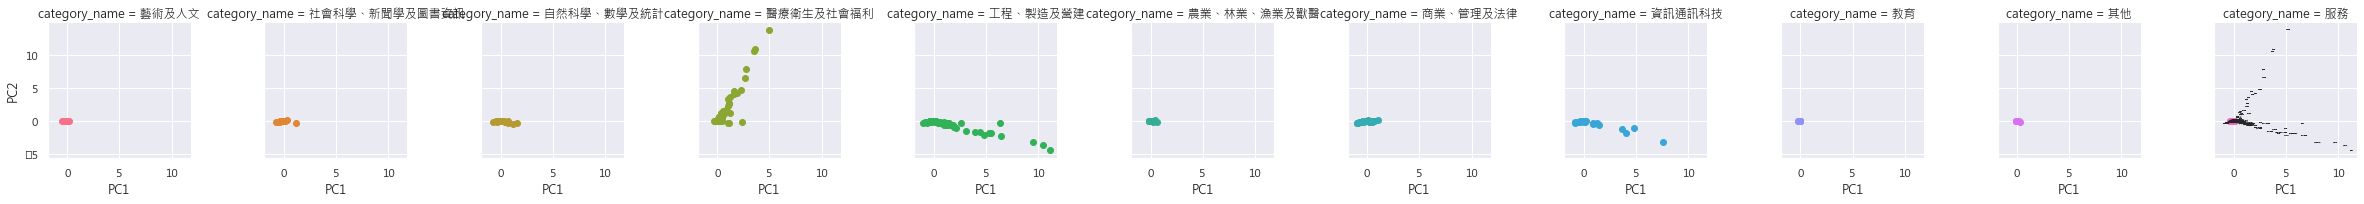

In [112]:
# faceting，看各個類別的分布
g = sns.FacetGrid(pc_df, col="category_name", hue="category_name")
label_point(pc_df.PC1, pc_df.PC2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "PC1", "PC2")).savefig('Faceting_pca.png', dpi=1000)

### Discusion
根據選擇 Variance 較大的偏好，選前兩大eigenvalue的eigenvector（component 1 與 compontent 2）來建立 2D 圖形。

由於Jupyter Lab有限制圖形大小，以及data point集中程度高，因此使用faceting輸出各個類別的分佈進行查看。

可發現此將維方法在「醫療衛生及社會福利」與「工程、製造及營建」這兩個類別上的學校與科系在二維圖形中與其他類別的學校有較明顯的分佈上的不同。但其於類別的學校與科系則在圖形上並無明顯區隔，這可能是因為我們只選擇兩個component做圖的原因，若維度擴增到8個維度，PCA應是不錯的降維工具。

## Q2.2
Visualize academic departments using multiple dimensional scaling. Consider both the metric and non-metric settings. Discuss the result.

In [113]:
from sklearn.manifold import MDS
embedding = MDS(metric=True)
X_transformed = embedding.fit_transform(stu_adm_matrix)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


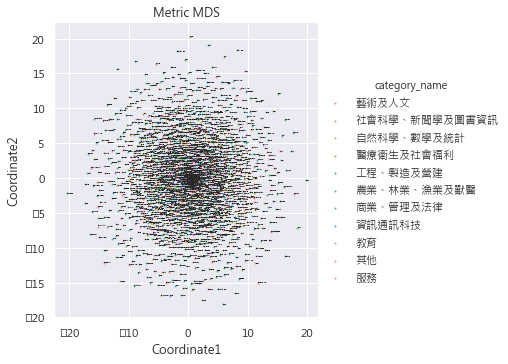

In [114]:
mds_df = pd.DataFrame(data = X_transformed , 
        columns = ['Coordinate1', 'Coordinate2'])
mds_df['Cluster'] = dep_label
mds_df['category_name'] = mds_df['Cluster'].map(category_name)

ax = sns.lmplot( x="Coordinate1", y="Coordinate2",
  data=mds_df, 
  fit_reg=False, 
  hue='category_name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('Metric MDS')
label_point(mds_df.Coordinate1, mds_df.Coordinate2, data_point_label, plt.gca())
plt.savefig("metric_MDS.png", dpi=1000)

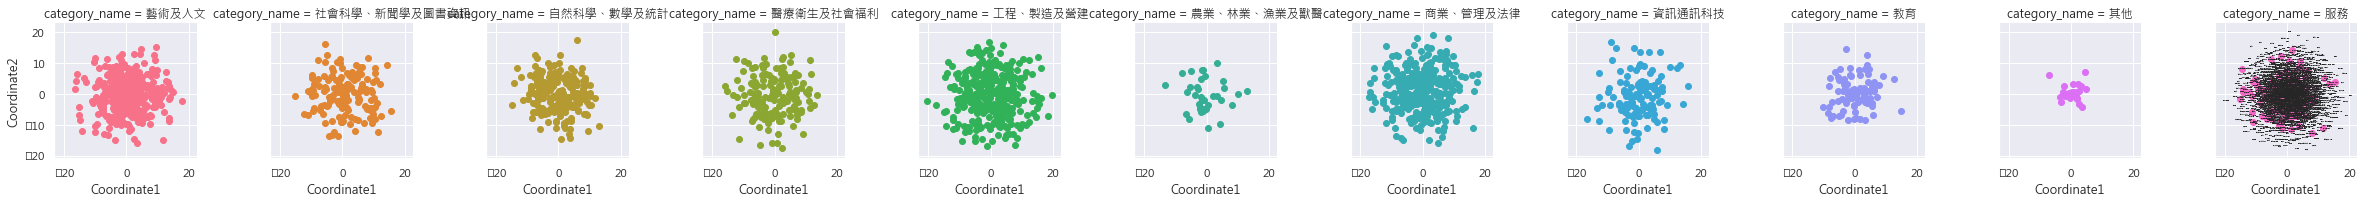

In [116]:
# faceting，看各個類別的分布
g = sns.FacetGrid(mds_df, col="category_name", hue="category_name")
label_point(mds_df.Coordinate1, mds_df.Coordinate2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "Coordinate1", "Coordinate2"))

---

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


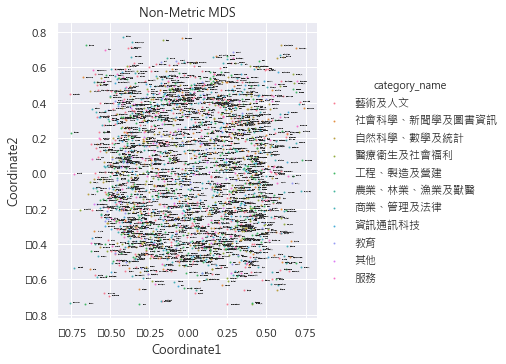

In [118]:
embedding = MDS(metric=False)
X_transformed = embedding.fit_transform(stu_adm_matrix)
non_mds_df = pd.DataFrame(data = X_transformed , 
        columns = ['Coordinate1', 'Coordinate2'])
non_mds_df['Cluster'] = dep_label
non_mds_df['category_name'] = non_mds_df['Cluster'].map(category_name)

ax = sns.lmplot( x="Coordinate1", y="Coordinate2",
  data=non_mds_df, 
  fit_reg=False, 
  hue='category_name', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('Non-Metric MDS')
label_point(non_mds_df.Coordinate1, non_mds_df.Coordinate2, data_point_label, plt.gca())
plt.savefig("nonMetric_MDS.png", dpi=1000)

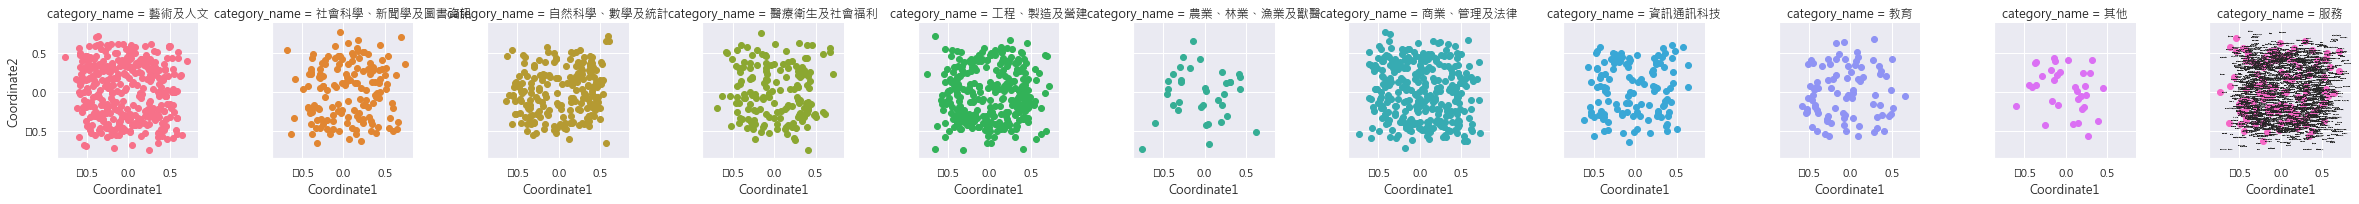

In [119]:
# faceting，看各個類別的分布
g = sns.FacetGrid(non_mds_df, col="category_name", hue="category_name")
label_point(non_mds_df.Coordinate1, non_mds_df.Coordinate2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "Coordinate1", "Coordinate2"))

### Discussion
雖然 MDS 降維後的圖形 data point 之間 overlap 程度降低，但為了更清楚看出每個類別 data point 的分佈，因此使用faceting輸出各個類別的分佈進行查看。

論類別中各點的集中程度可發現，相較 non-metric setting MDS，metric settings MDS 集中程度較高。但是論各點的位置分佈，並無法看出明顯有區分出不同類別區塊的狀況。

## Q2.3
Visualize academic departments using Locally Linear Embedding. Consider three variations: 
1. Use 20 neighbors to construct the weight matrix; 

2. Use 40 neighbors to construct the weight matrix; 

3. Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors).

Discuss the result.

In [129]:
# Use 20 neighbors to construct the weight matrix
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_transformed_LLE20 = embedding.fit_transform(stu_adm_matrix)

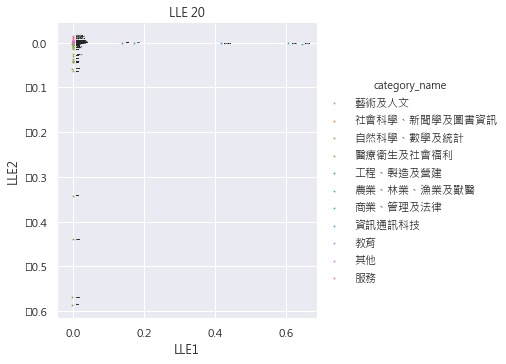

In [134]:
LLE_20_df = pd.DataFrame(data = X_transformed_LLE20, columns = ['LLE1', 'LLE2'])
LLE_20_df['Cluster'] = dep_label
LLE_20_df['category_name'] = LLE_20_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'LLE1', y = 'LLE2',
  data=LLE_20_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('LLE 20')
label_point(LLE_20_df.LLE1, LLE_20_df.LLE2, data_point_label, plt.gca())
plt.savefig("LLE_20.png", dpi=1000)

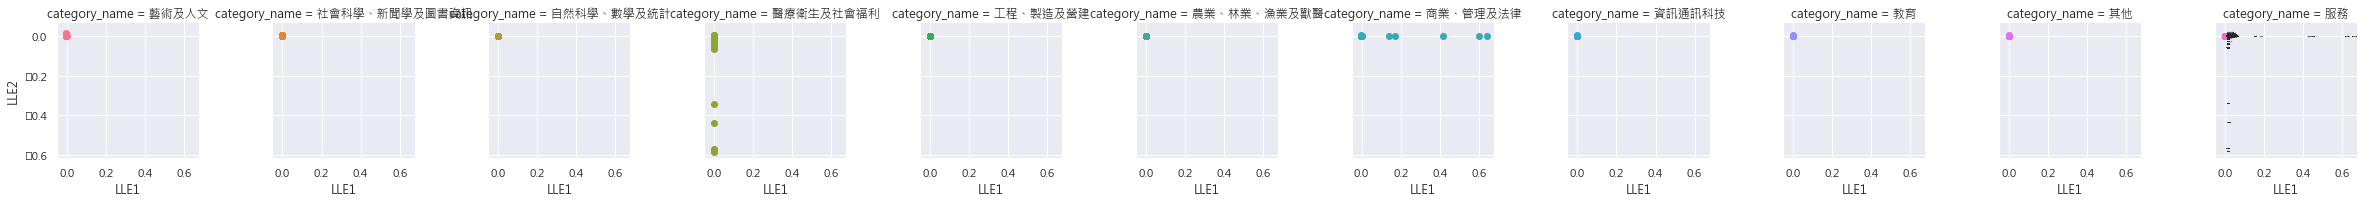

In [135]:
# faceting，看各個類別的分布
g = sns.FacetGrid(LLE_20_df, col="category_name", hue="category_name")
label_point(LLE_20_df.LLE1, LLE_20_df.LLE2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "LLE1", "LLE2"))

---

In [136]:
# Use 40 neighbors to construct the weight matrix
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=40)
X_transformed_LLE40 = embedding.fit_transform(stu_adm_matrix)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


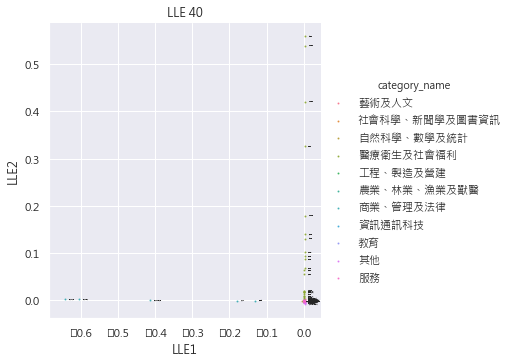

In [137]:
LLE_40_df = pd.DataFrame(data = X_transformed_LLE40, columns = ['LLE1', 'LLE2'])
LLE_40_df['Cluster'] = dep_label
LLE_40_df['category_name'] = LLE_40_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'LLE1', y = 'LLE2',
  data=LLE_40_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}).savefig('LLE_40.png') # specify the point size

plt.title('LLE 40')
label_point(LLE_40_df.LLE1, LLE_40_df.LLE2, data_point_label, plt.gca())
plt.savefig("LLE_40.png", dpi=1000)

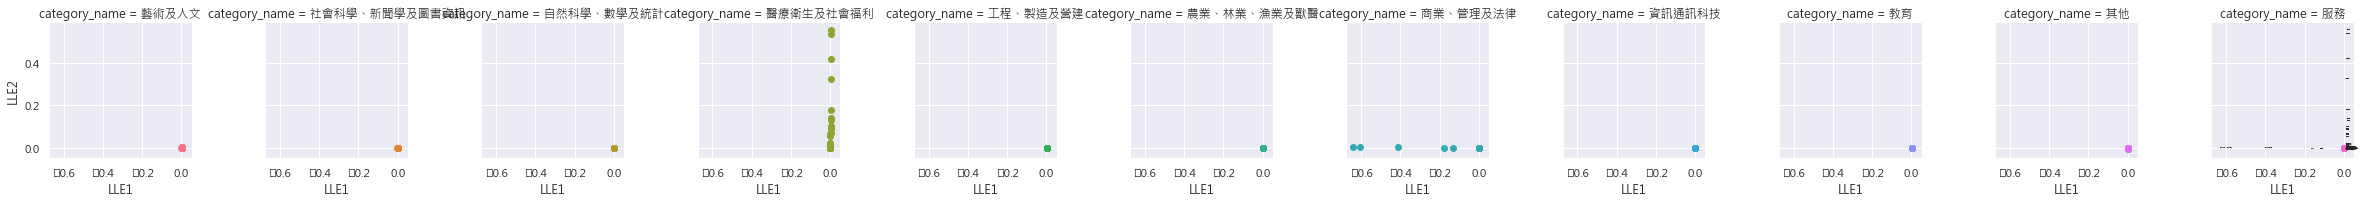

In [138]:
# faceting，看各個類別的分布
g = sns.FacetGrid(LLE_40_df, col="category_name", hue="category_name")
label_point(LLE_40_df.LLE1, LLE_40_df.LLE2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "LLE1", "LLE2"))

---

In [139]:
# Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors)
pca = PCA(n_components=100)
X_new = pca.fit_transform(stu_adm_matrix)

embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_transformed_pca_LLE20 = embedding.fit_transform(X_new)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


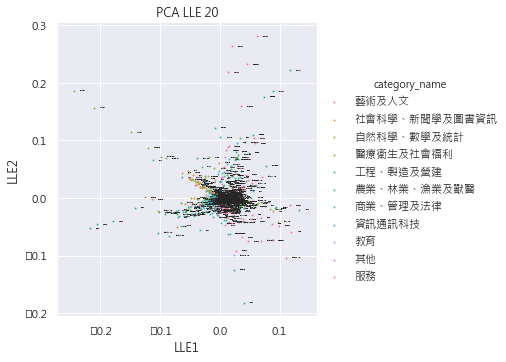

In [140]:
pca_LLE_20_df = pd.DataFrame(data = X_transformed_pca_LLE20, columns = ['LLE1', 'LLE2'])
pca_LLE_20_df['Cluster'] = dep_label
pca_LLE_20_df['category_name'] = pca_LLE_20_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'LLE1', y = 'LLE2',
  data=pca_LLE_20_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1})# specify the point size

plt.title('PCA LLE 20')
label_point(pca_LLE_20_df.LLE1, pca_LLE_20_df.LLE2, data_point_label, plt.gca())
plt.savefig("pca_LLE_20.png", dpi=1000)

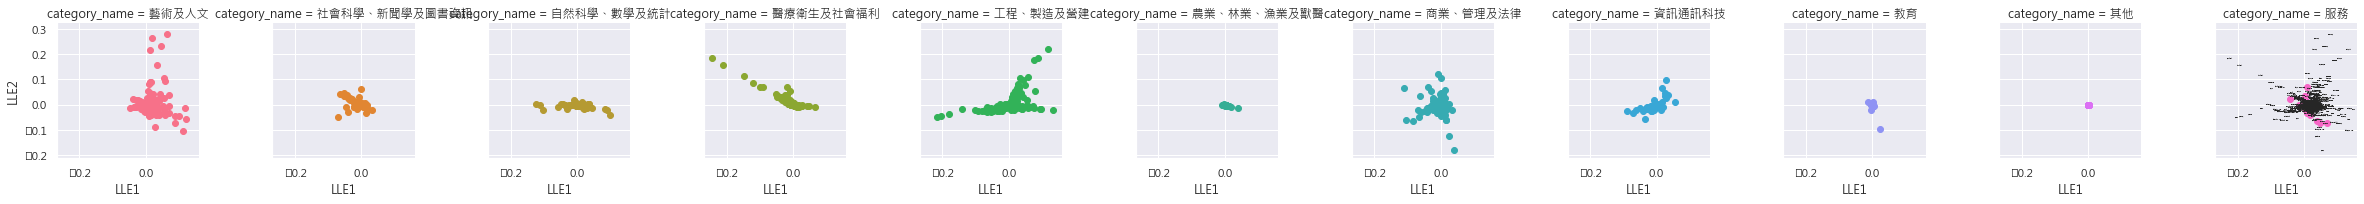

In [160]:
# faceting，看各個類別的分布
g = sns.FacetGrid(pca_LLE_20_df, col="category_name", hue="category_name")
label_point(pca_LLE_20_df.LLE1, pca_LLE_20_df.LLE2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "LLE1", "LLE2"))

### Discussion
由於Jupyter Lab有限制圖形大小，以及data point集中程度高，因此使用faceting輸出各個類別的分佈進行查看。

由降維結果可發現，Neighbor 數為 20 與 Neighbor 數為 40 的降維結果類似，大多數的類別其 data point 都非常集中在左上與右下，只有部分「醫療及社會福利」與「商業、管理及法律」類別中的 data point 與其他類別的 data point 分佈位置較不同，較容易從降維中辨識出這兩個類別。

而先做完PCA後再做 LLE (neighbor 數為 20)，其降維效果優於只做 LLE 降維，雖然仍有多個類別其 data point 都集中在中間區域的狀況，但仍可看到「藝術及人文」、「自然科學、數學及統計」、「醫療衛生及社會福利」、「工程、製造及營建」與「商業、管理及法律」這幾個類別的部分 data point 可看出跟其他類別有明顯的不同分佈。

## Q2.4
Visualize academic departments using Kernel PCA. You should at least consider the RBF and Cosine kernel. It is your responsibility to select reasonably good kernel parameters. Discuss the result.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


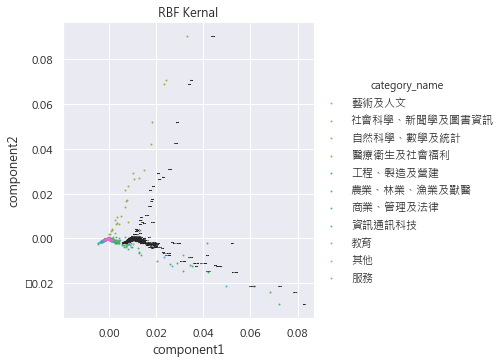

In [142]:
from sklearn.decomposition import KernelPCA

# rbf keranl PCA
transformer = KernelPCA(n_components = 2, kernel='rbf')
X_transformed_rbf_kernal = transformer.fit_transform(stu_adm_matrix)

rbf_kernal_df = pd.DataFrame(data = X_transformed_rbf_kernal, columns = ['component1', 'component2'])
rbf_kernal_df['Cluster'] = dep_label
rbf_kernal_df['category_name'] = rbf_kernal_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'component1', y = 'component2',
  data=rbf_kernal_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('RBF Kernal')
label_point(rbf_kernal_df.component1, rbf_kernal_df.component2, data_point_label, plt.gca())
plt.savefig("rbf_kernal.png", dpi=1000)

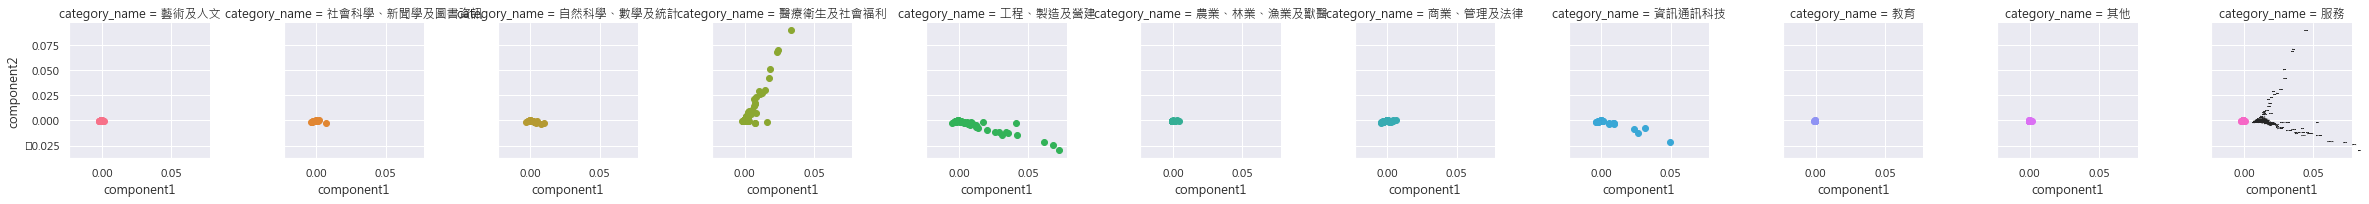

In [143]:
# faceting，看各個類別的分布
g = sns.FacetGrid(rbf_kernal_df, col="category_name", hue="category_name")
label_point(rbf_kernal_df.component1, rbf_kernal_df.component2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "component1", "component2"))

---

In [144]:
# Cosine kernel PCA
transformer = KernelPCA(n_components = 2, kernel='cosine')
X_transformed_cosine_kernal = transformer.fit_transform(stu_adm_matrix)
X_transformed_cosine_kernal.shape

(1917, 2)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


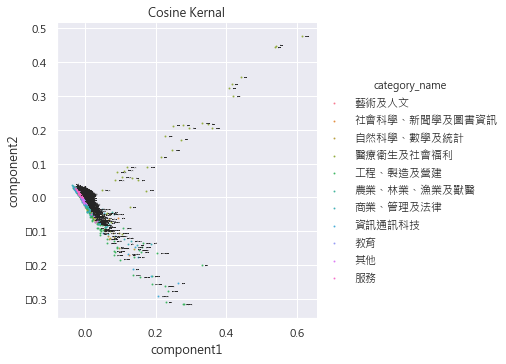

In [145]:
cosine_kernal_df = pd.DataFrame(data = X_transformed_cosine_kernal, columns = ['component1', 'component2'])
cosine_kernal_df['Cluster'] = dep_label
cosine_kernal_df['category_name'] = cosine_kernal_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'component1', y = 'component2',
  data=cosine_kernal_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('Cosine Kernal')
label_point(cosine_kernal_df.component1, cosine_kernal_df.component2, data_point_label, plt.gca())
plt.savefig("cosine_kernal.png", dpi=1000)

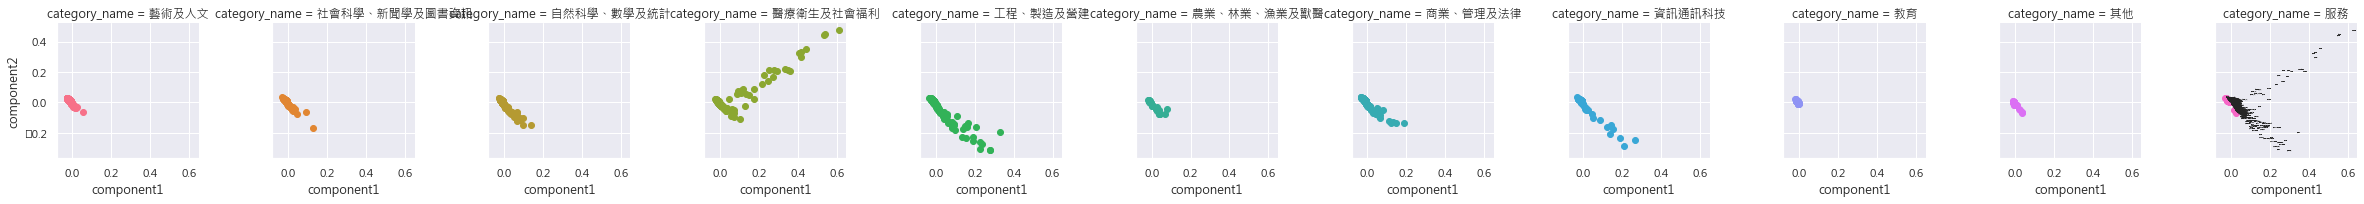

In [146]:
# faceting，看各個類別的分布
g = sns.FacetGrid(cosine_kernal_df, col="category_name", hue="category_name")
label_point(cosine_kernal_df.component1, cosine_kernal_df.component2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "component1", "component2"))

### Discussion
由於Jupyter Lab有限制圖形大小，以及data point集中程度高，因此使用faceting輸出各個類別的分佈進行查看。

通常 Kernal PCA 較 PCA 更適合處理非線性的問題，但以目前 data point 的分佈來看，PCA 的分佈結果跟 Kernal PCA 在選擇兩個 component 作圖的狀況下，降維結果表現類似。

在 Cosine Kernal PCA 與 RBF Keranl PCA 中可發現，在「醫療衛生及社會福利」與「工程、製造及營建」這兩個類別上的學校與科系在二維圖形中與其他類別的學校有較明顯的分佈上的不同。但其於類別的學校與科系則在圖形上並無明顯區隔，這可能是因為我們只選擇兩個component做圖的原因，若維度擴增到更多維度，Kernal PCA應是不錯的降維工具。

降維結果也可發現 Cosine Kernal PCA 的 data point 分佈較為鬆散，RBF Kernal PCA 的 data point 分佈較為集中。

## Q2.5
Visualize academic departments using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that your results can be repeated. Discuss the result.

In [147]:
from sklearn.manifold import TSNE
np.random.seed(123456)
# Euclidian tsne
tsne = TSNE(n_components=2, metric='euclidean')
X_tsne = tsne.fit_transform(stu_adm_matrix)

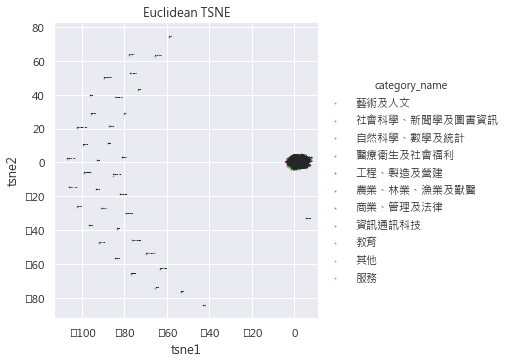

In [150]:
euclidean_tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne1', 'tsne2'])
euclidean_tsne_df['Cluster'] = dep_label
euclidean_tsne_df['category_name'] = euclidean_tsne_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'tsne1', y = 'tsne2',
  data=euclidean_tsne_df, 
  fit_reg=False, 
  hue='category_name',
  scatter_kws={"s": 1}) # specify the point size

plt.title('Euclidean TSNE')
label_point(euclidean_tsne_df.tsne1, euclidean_tsne_df.tsne2, data_point_label, plt.gca())
plt.savefig("euclidean_tsne.png", dpi=1000)

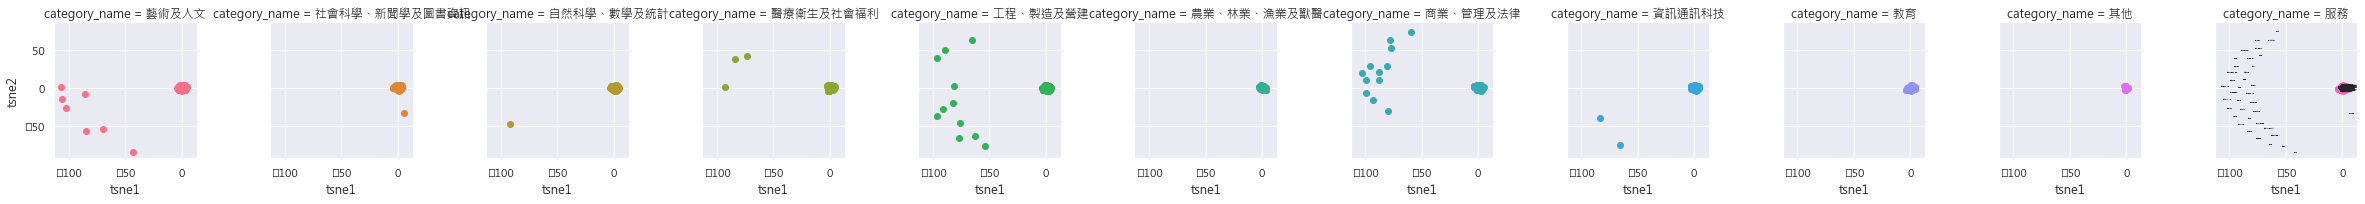

In [152]:
# faceting，看各個類別的分布
g = sns.FacetGrid(euclidean_tsne_df, col="category_name", hue="category_name")
label_point(euclidean_tsne_df.tsne1, euclidean_tsne_df.tsne2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "tsne1", "tsne2"))

---

In [153]:
# Cosine tsne
np.random.seed(123456)
tsne = TSNE(n_components=2, metric='cosine')
X_tsne = tsne.fit_transform(stu_adm_matrix)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


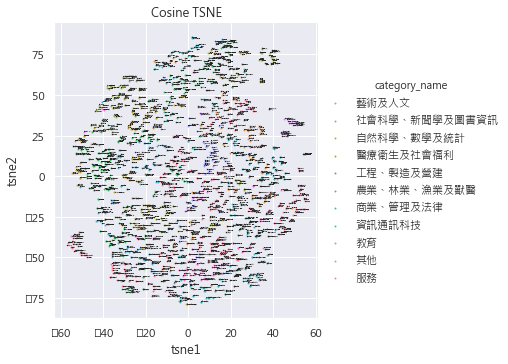

In [154]:
cosine_tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne1', 'tsne2'])
cosine_tsne_df['Cluster'] = dep_label
cosine_tsne_df['category_name'] = cosine_tsne_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'tsne1', y = 'tsne2',
  data=cosine_tsne_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}) # specify the point size

plt.title('Cosine TSNE')
label_point(cosine_tsne_df.tsne1, cosine_tsne_df.tsne2, data_point_label, plt.gca())
plt.savefig("cosine_tsne.png", dpi=1000)

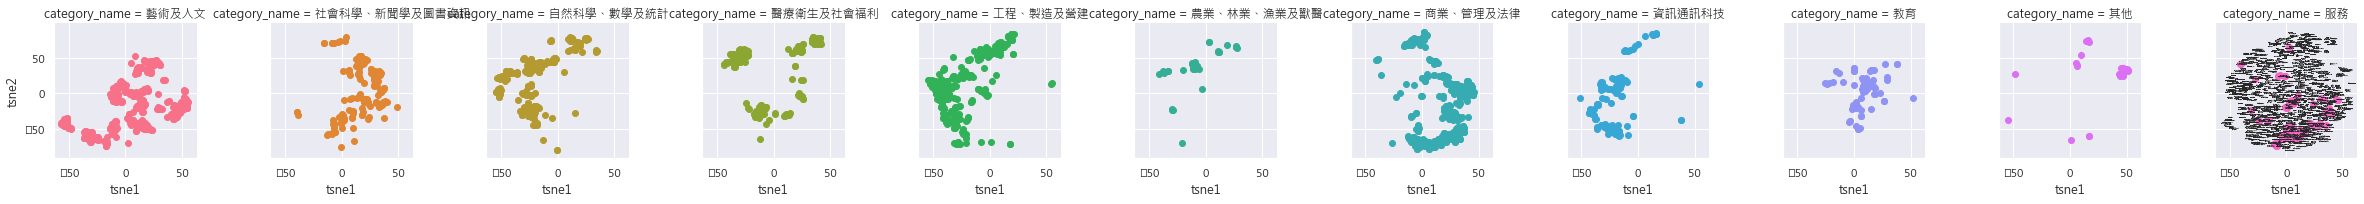

In [155]:
# faceting，看各個類別的分布
g = sns.FacetGrid(cosine_tsne_df, col="category_name", hue="category_name")
label_point(cosine_tsne_df.tsne1, cosine_tsne_df.tsne2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "tsne1", "tsne2"))

---

In [157]:
# Jaccard tsne
tsne = TSNE(n_components=2, metric='jaccard')
X_tsne = tsne.fit_transform(stu_adm_matrix)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


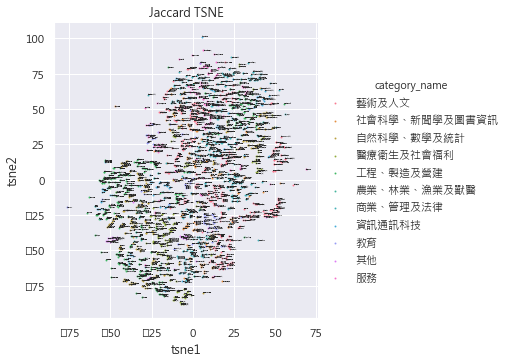

In [158]:
jaccard_tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne1', 'tsne2'])
jaccard_tsne_df['Cluster'] = dep_label
jaccard_tsne_df['category_name'] = jaccard_tsne_df['Cluster'].map(category_name)

ax = sns.lmplot(x = 'tsne1', y = 'tsne2',
  data=jaccard_tsne_df, 
  fit_reg=False, 
  hue='category_name',
  legend=True,
  scatter_kws={"s": 1}).savefig('jaccard_tsne.png') # specify the point size

plt.title('Jaccard TSNE')
label_point(jaccard_tsne_df.tsne1, jaccard_tsne_df.tsne2, data_point_label, plt.gca())
plt.savefig("jaccard_tsne.png", dpi=1000)

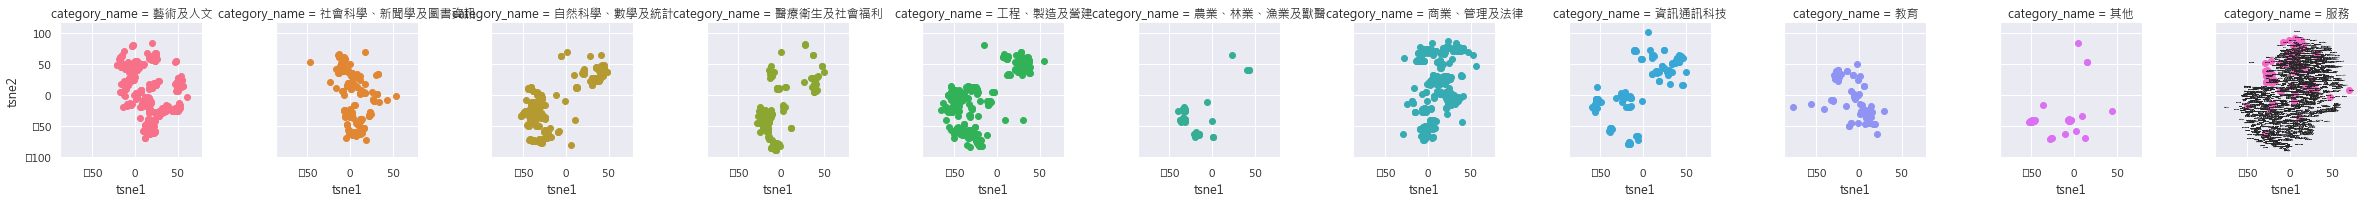

In [159]:
# faceting，看各個類別的分布
g = sns.FacetGrid(jaccard_tsne_df, col="category_name", hue="category_name")
label_point(jaccard_tsne_df.tsne1, jaccard_tsne_df.tsne2, data_point_label, plt.gca())
g = (g.map(plt.scatter, "tsne1", "tsne2"))

### Discussion
由於Jupyter Lab有限制圖形大小，以及data point集中程度高，因此使用faceting輸出各個類別的分佈進行查看。

不同 metric 的 TSNE 降維結果表現十分不同，其中又以 euclidean matric 與其他兩者的差距最大。euclidean matric 中多數 data point 都集中在左邊中間區域，類別與類別之間的 data point 無法看出因不同類別造成的分佈上差距。

降維結果的表現以 Cosine metric 表現最好，可看出多個類別都有其 data point 的主要分佈位置。

# Question 3 :Refine
PCA降維可明顯看出兩個類別與其他類別分佈上的差異，但因為侷限在呈現上只能以二維來呈現，因此其他類別並無法從二維圖形中看出類別分佈上的差異，但如果視覺化可呈現十個維度的話，PCA 將會是很好的降維方法。

綜合表現上來說，個人認為 Cosine metric 的表現最好，多個類別在二維視覺化中都有其 data point 的主要分佈位置，因此圖片將會上傳 Cosine metric 的圖形。
